Connected to base (Python 3.11.5)

In [32]:
from datasets import load_dataset
import matplotlib.pyplot as plt
from transformers import AutoModelForImageClassification, AutoConfig, TrainingArguments, Trainer, AutoModel, AutoImageProcessor
from transformers import CLIPProcessor, CLIPModel
from utils import read_yaml, getYAMLParameter, HugginfaceProcessorData
from datasets import load_dataset
from torch.utils.data import DataLoader
from logger import OnePixelLogger, CWLogger, PGDLogger
from utils import plot_grid, getYAMLParameter, l2_distance, plot_image_comparison, conf_matrix_img
import tqdm
import wandb
import math
import argparse 
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from clip_classifier import clip_classifier

dir = "mrm8488/ImageNet1K-val"
label_feature_title = "label"
image_feature_title = "image"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dataset = load_dataset(dir)
dataset = dataset["train"].shuffle(seed=43).select(range(1000))
labels_names = dataset.features[label_feature_title].names

Found cached dataset parquet (/home/cesar/.cache/huggingface/datasets/mrm8488___parquet/mrm8488--ImageNet1K-val-8f039e82e9976842/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached shuffled indices for dataset at /home/cesar/.cache/huggingface/datasets/mrm8488___parquet/mrm8488--ImageNet1K-val-8f039e82e9976842/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-d2fbe8e754112cd9.arrow


In [33]:
model  = clip_classifier(clip_model_name="openai/clip-vit-base-patch32",
                                  labels_name=labels_names, device = device)
image_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
def clip_preprocess(examples):
    # Process the images
    inputs = image_processor( images=examples[image_feature_title], return_tensors="pt",padding = True).data
    examples["pixel_values"] = inputs["pixel_values"]
    return examples
        
processed_dataset =  dataset.map(clip_preprocess, batched=True).with_format("torch")

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [ ]:
from ..config.image_net_classes import IMAGENET2012_CLASSES

In [34]:
labels_names = [for ]

['n01440764',
 'n01443537',
 'n01484850',
 'n01491361',
 'n01494475',
 'n01496331',
 'n01498041',
 'n01514668',
 'n01514859',
 'n01518878',
 'n01530575',
 'n01531178',
 'n01532829',
 'n01534433',
 'n01537544',
 'n01558993',
 'n01560419',
 'n01580077',
 'n01582220',
 'n01592084',
 'n01601694',
 'n01608432',
 'n01614925',
 'n01616318',
 'n01622779',
 'n01629819',
 'n01630670',
 'n01631663',
 'n01632458',
 'n01632777',
 'n01641577',
 'n01644373',
 'n01644900',
 'n01664065',
 'n01665541',
 'n01667114',
 'n01667778',
 'n01669191',
 'n01675722',
 'n01677366',
 'n01682714',
 'n01685808',
 'n01687978',
 'n01688243',
 'n01689811',
 'n01692333',
 'n01693334',
 'n01694178',
 'n01695060',
 'n01697457',
 'n01698640',
 'n01704323',
 'n01728572',
 'n01728920',
 'n01729322',
 'n01729977',
 'n01734418',
 'n01735189',
 'n01737021',
 'n01739381',
 'n01740131',
 'n01742172',
 'n01744401',
 'n01748264',
 'n01749939',
 'n01751748',
 'n01753488',
 'n01755581',
 'n01756291',
 'n01768244',
 'n01770081',
 'n017

In [35]:
a = processed_dataset[0:2]["pixel_values"]

In [28]:
a.shape

torch.Size([2, 3, 224, 224])

In [29]:
pred = model(a)

In [30]:
pred

ImageClassifierOutput(loss=None, logits=tensor([[0.9972, 0.0028],
        [0.0031, 0.9969]], device='cuda:0', grad_fn=<SoftmaxBackward0>), hidden_states=None, attentions=None)

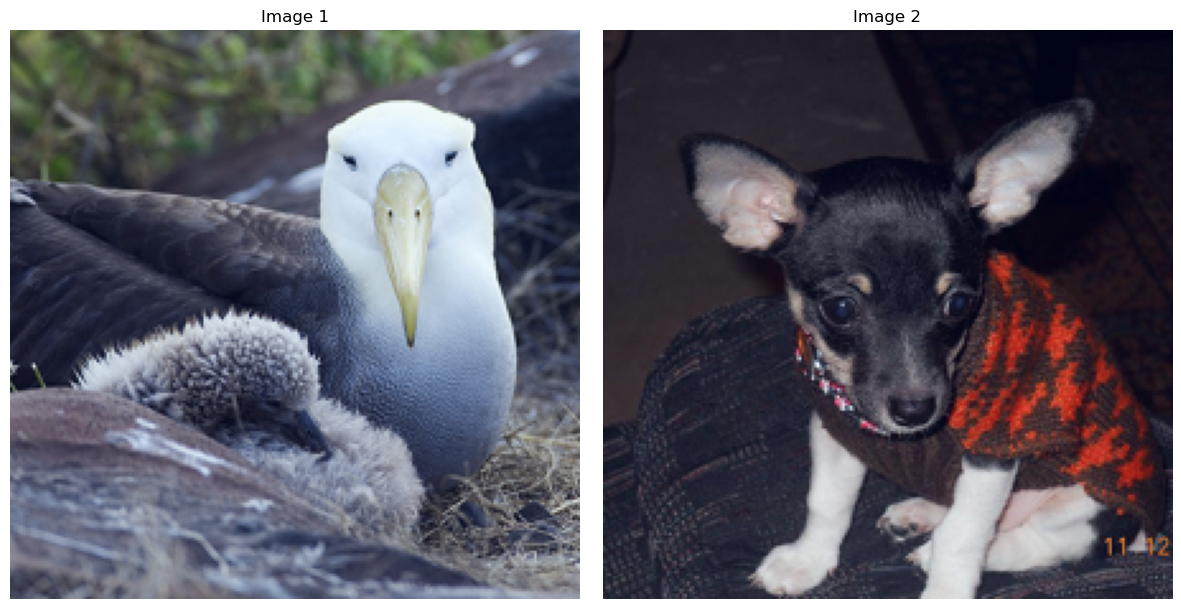

In [31]:
import matplotlib.pyplot as plt
import torch

# Assuming 'a' is your list or array of image tensors
image1 = a[0].permute(1, 2, 0).numpy()  # Reorder dimensions for Matplotlib
image2 = a[1].permute(1, 2, 0).numpy()  # Reorder dimensions for Matplotlib

# Scale the images if necessary (assuming they are in tensor format and scaled from 0 to 1)
image1 = (image1 - image1.min()) / (image1.max() - image1.min())
image2 = (image2 - image2.min()) / (image2.max() - image2.min())

# Create a subplot layout with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize to suit your needs

# Plot the first image
axes[0].imshow(image1)
axes[0].axis('off')  # Turn off axis numbers and ticks
axes[0].set_title('Image 1')  # Optional title

# Plot the second image
axes[1].imshow(image2)
axes[1].axis('off')  # Turn off axis numbers and ticks
axes[1].set_title('Image 2')  # Optional title

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()
